## Simple ODE with known analytic solution

$$
\frac{dx}{dt} = f(t, x),
\quad t \in [0, 10],
\quad x \in R^2
$$

$$
x(t) = a \sin(\omega t + \phi)
$$

$$
f(t, x) = a \omega \cos(\omega t + \phi)
$$

$$
a = \begin{bmatrix}
    1. \\
    2.
\end{bmatrix},
\quad
\omega = \begin{bmatrix}
    1.    \\
    \pi/2
\end{bmatrix},
\quad
\phi = \begin{bmatrix}
    \pi/4 \\
    \pi/2
\end{bmatrix},
$$

In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('./../lib')

from equation import Equation
from solver import Solver

In [2]:
# Equation parameters

d = 2
q = 2
m = 1

a = np.array([1., 2.])
o = np.array([1., np.pi/2])
p = np.array([np.pi/4., np.pi/2])

def s(t, x):  return np.zeros((d, q))
def f(t, x):  return a * o * np.cos(o*t + p)
def fx(t, x): return  -1. * a * o**2 * np.sin(o*t + p)
def x0(t, x): return np.array(xr(t, None))
def r0(t, x): return np.exp(-0.5 * np.diag(x.T@x))
def xr(t, w): return a * np.sin(o*t + p)

In [3]:
EQ = Equation(d, q, m)
EQ.init_t_lim(t_min=0., t_max=10., t_poi=100)
EQ.init_x_lim(x_min=-3., x_max=3., x_poi=10)
EQ.init_funcs(s, f, fx, x0, r0, xr)
EQ.prep()

In [4]:
SL = Solver(EQ)
SL.solve()

Total time    : 0.0138   sec
Time per step : 0.0001   sec


r min  : t=min 0.0001   | t=max 0.0003  
r max  : t=min 0.8948   | t=max 1.8815  
r mean : t=min 0.1412   | t=max 0.2968  


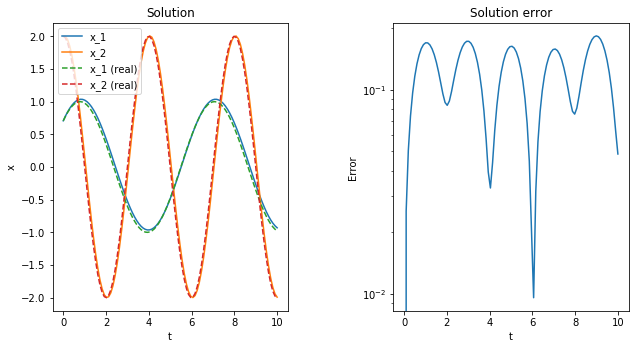

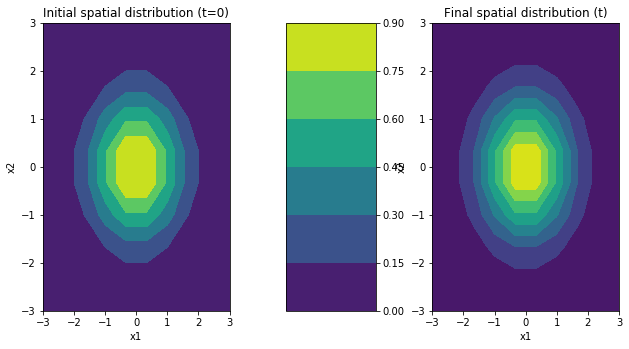

In [5]:
EQ.pres()
EQ.plot_x()
EQ.plot_r()

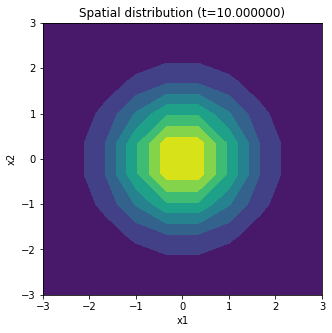

In [6]:
HTML(EQ.anim_r(fffolder='./../tmp', delt=200))